 # <center> SAT Score Prediction in NYC Schools </center>
## <center> An End-To-End Machine Learning Project </center>

# Data

In [1]:
# Find and delete extras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Sat-Scores.csv')
data.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


## Data Structure

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School ID                    435 non-null    object 
 1   School Name                  435 non-null    object 
 2   Borough                      435 non-null    object 
 3   Building Code                435 non-null    object 
 4   Street Address               435 non-null    object 
 5   City                         435 non-null    object 
 6   State                        435 non-null    object 
 7   Zip Code                     435 non-null    int64  
 8   Latitude                     435 non-null    float64
 9   Longitude                    435 non-null    float64
 10  Phone Number                 435 non-null    object 
 11  Start Time                   431 non-null    object 
 12  End Time                     431 non-null    object 
 13  Student Enrollment  

In [4]:
data["Borough"].value_counts()

Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: Borough, dtype: int64

In [5]:
data["Building Code"].value_counts()

X425    6
X435    6
M490    6
X410    6
X405    6
       ..
R600    1
X839    1
M495    1
Q690    1
K540    1
Name: Building Code, Length: 256, dtype: int64

In [6]:
data["City"].value_counts()
# 27 unique values

Brooklyn               121
Bronx                  118
Manhattan              106
Jamaica                 13
Long Island City        12
Staten Island           10
Flushing                 8
Astoria                  6
Elmhurst                 5
Springfield Gardens      4
Cambria Heights          4
Rockaway Park            4
Ozone Park               3
Fresh Meadows            3
Forest Hills             3
Far Rockaway             3
Queens Village           2
Saint Albans             1
Oakland Gardens          1
Corona                   1
Richmond Hill            1
Queens                   1
South Richmond Hill      1
Bayside                  1
Bellerose                1
Hollis                   1
Ridgewood                1
Name: City, dtype: int64

In [7]:
data["Zip Code"].value_counts()

10457    13
10002    12
11101    12
11201    11
10456    11
         ..
10033     1
10034     1
10039     1
11102     1
11238     1
Name: Zip Code, Length: 120, dtype: int64

In [8]:
data["Borough"].value_counts()

Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: Borough, dtype: int64

In [9]:
data['average_total_score'] = data['Average Score (SAT Math)'] + data['Average Score (SAT Reading)'] + data['Average Score (SAT Writing)']
data.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,average_total_score
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%,1859.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%,1193.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%,1261.0


In [10]:
data.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),average_total_score
count,435.000000,435.000000,435.000000,428.000000,375.000000,375.000000,375.000000,375.000000
mean,10726.096552,40.745472,-73.921072,702.357477,432.944000,424.504000,418.458667,1275.906667
std,537.927907,0.080937,0.071705,759.176061,71.952373,61.881069,64.548599,194.906283
min,10001.000000,40.528230,-74.192150,62.000000,317.000000,302.000000,284.000000,924.000000
25%,10301.500000,40.690495,-73.979260,357.250000,386.000000,386.000000,382.000000,1157.000000
50%,10472.000000,40.741210,-73.925140,466.000000,415.000000,413.000000,403.000000,1226.000000
75%,11217.000000,40.822095,-73.882580,623.250000,458.500000,445.000000,437.500000,1330.500000
max,11694.000000,40.888370,-73.726910,5447.000000,754.000000,697.000000,693.000000,2144.000000


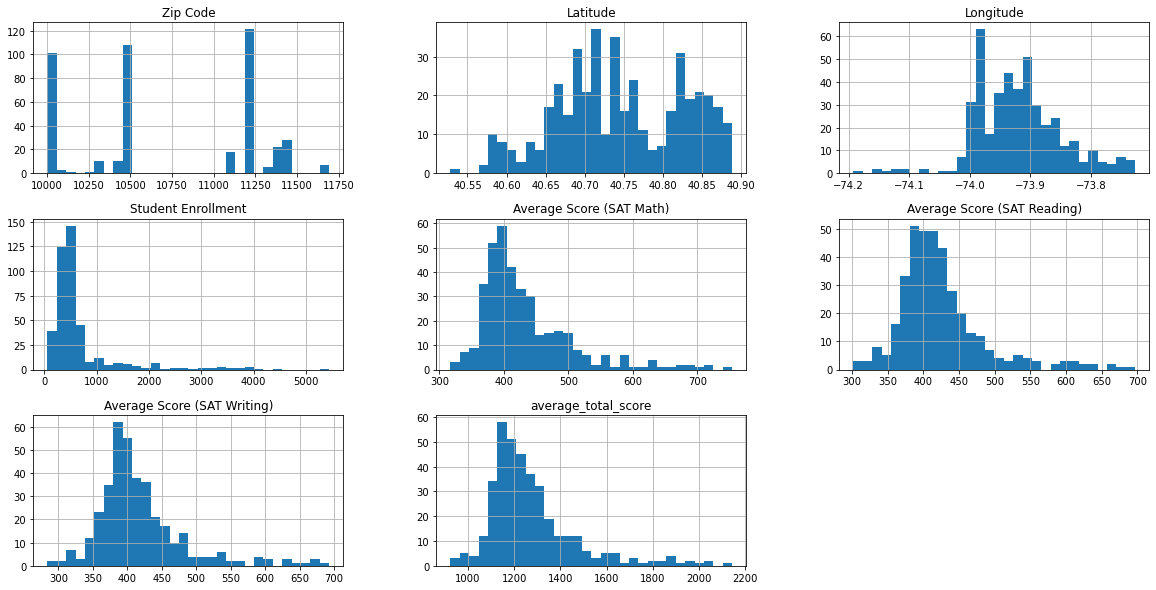

In [11]:
data.hist(bins=30, figsize=(20, 10), layout=(3, 3))
plt.savefig("attribute_histogram_plots")
plt.show()

In [12]:
# drop useless columns
data.drop(columns=["School Name", "Street Address", "State", "Phone Number", "Average Score (SAT Math)", "Average Score (SAT Reading)", "Average Score (SAT Writing)"], inplace=True)
data.head()

,School ID,Borough,Building Code,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,average_total_score
0,02M260,Manhattan,M933,Manhattan,10001,40.75321,-73.99786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Manhattan,M052,Manhattan,10002,40.86605,-73.92486,8:30 AM,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN
2,01M539,Manhattan,M022,Manhattan,10002,40.71873,-73.97943,8:15 AM,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,91.0%,1859.0
3,02M294,Manhattan,M445,Manhattan,10002,40.71687,-73.98953,8:00 AM,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,78.9%,1193.0
4,02M308,Manhattan,M445,Manhattan,10002,40.71687,-73.98953,8:30 AM,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,65.1%,1261.0


In [13]:
# turn % to decimals
def chg(var0):
    if isinstance(var0, str): return float(str(var0)[:-1])/100
    return var0

data['Percent White'] = data['Percent White'].map(lambda x: chg(x))
data['Percent Black'] = data['Percent Black'].map(lambda x: chg(x))
data['Percent Hispanic'] = data['Percent Hispanic'].map(lambda x: chg(x))
data['Percent Asian'] = data['Percent Asian'].map(lambda x: chg(x))
data['Percent Tested'] = data['Percent Tested'].map(lambda x: chg(x))
data.head()

,School ID,Borough,Building Code,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,average_total_score
0,02M260,Manhattan,M933,Manhattan,10001,40.75321,-73.99786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Manhattan,M052,Manhattan,10002,40.86605,-73.92486,8:30 AM,3:00 PM,87.0,0.034,0.218,0.678,0.046,NaN,NaN
2,01M539,Manhattan,M022,Manhattan,10002,40.71873,-73.97943,8:15 AM,4:00 PM,1735.0,0.286,0.133,0.180,0.385,0.910,1859.0
3,02M294,Manhattan,M445,Manhattan,10002,40.71687,-73.98953,8:00 AM,2:45 PM,358.0,0.117,0.385,0.413,0.059,0.789,1193.0
4,02M308,Manhattan,M445,Manhattan,10002,40.71687,-73.98953,8:30 AM,3:00 PM,383.0,0.031,0.282,0.569,0.086,0.651,1261.0


Conclusion:

Note: Latitude: North/South, Longitude: East/West <br/>
Looking at the data...

## Test Set

In [14]:
# to make this notebook's output identical at every run
np.random.seed(25)

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=25)

In [16]:
test_set.head()

,School ID,Borough,Building Code,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,average_total_score
399,29Q492,Queens,Q490,Cambria Heights,11411,40.69554,-73.73492,8:00 AM,2:25 PM,433.0,0.016,0.723,0.118,0.099,0.549,1186.0
237,30Q301,Queens,Q404,Long Island City,11101,40.74114,-73.94969,9:00 AM,3:30 PM,515.0,0.208,0.159,0.542,0.058,0.950,1346.0
273,13K412,Brooklyn,K117,Brooklyn,11205,40.69258,-73.95887,8:30 AM,3:20 PM,404.0,0.007,0.785,0.178,0.012,0.517,1124.0
61,03M541,Manhattan,M490,Manhattan,10023,40.77430,-73.98482,8:00 AM,2:30 PM,451.0,0.131,0.164,0.379,0.259,0.972,1647.0
397,29Q498,Queens,Q490,Cambria Heights,11411,40.69554,-73.73492,8:00 AM,2:45 PM,525.0,0.011,0.810,0.118,0.055,0.602,1194.0


<AxesSubplot:>

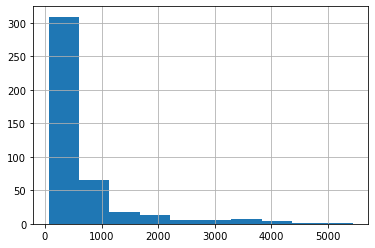

In [17]:
data["Student Enrollment"].hist()

In [18]:
data["enrollment_cat"] = pd.cut(data["Student Enrollment"],
                               bins=[0., 500, 1000, 1500, 2000, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [19]:
data.isna().sum()

School ID               0
Borough                 0
Building Code           0
City                    0
Zip Code                0
Latitude                0
Longitude               0
Start Time              4
End Time                4
Student Enrollment      7
Percent White           7
Percent Black           7
Percent Hispanic        7
Percent Asian           7
Percent Tested         49
average_total_score    60
enrollment_cat          7
dtype: int64

In [20]:
data.head()

,School ID,Borough,Building Code,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,average_total_score,enrollment_cat
0,02M260,Manhattan,M933,Manhattan,10001,40.75321,-73.99786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Manhattan,M052,Manhattan,10002,40.86605,-73.92486,8:30 AM,3:00 PM,87.0,0.034,0.218,0.678,0.046,NaN,NaN,1
2,01M539,Manhattan,M022,Manhattan,10002,40.71873,-73.97943,8:15 AM,4:00 PM,1735.0,0.286,0.133,0.180,0.385,0.910,1859.0,4
3,02M294,Manhattan,M445,Manhattan,10002,40.71687,-73.98953,8:00 AM,2:45 PM,358.0,0.117,0.385,0.413,0.059,0.789,1193.0,1
4,02M308,Manhattan,M445,Manhattan,10002,40.71687,-73.98953,8:30 AM,3:00 PM,383.0,0.031,0.282,0.569,0.086,0.651,1261.0,1


In [21]:
data["enrollment_cat"].value_counts()

1    249
2    117
5     31
3     21
4     10
Name: enrollment_cat, dtype: int64

<AxesSubplot:>

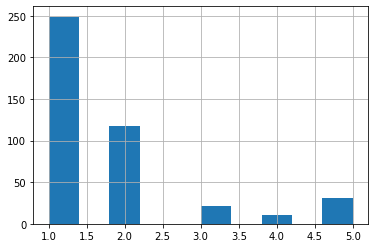

In [22]:
data["enrollment_cat"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

data = data[data['enrollment_cat'].notna()]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=25)
for train_index, test_index in split.split(data, data["enrollment_cat"]):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]

In [24]:
strat_test_set["enrollment_cat"].value_counts() / len(strat_test_set)

1    0.581395
2    0.279070
5    0.069767
3    0.046512
4    0.023256
Name: enrollment_cat, dtype: float64

In [25]:
data["enrollment_cat"].value_counts() / len(data)

1    0.581776
2    0.273364
5    0.072430
3    0.049065
4    0.023364
Name: enrollment_cat, dtype: float64

In [26]:
def enrollment_cat_proportions(dataset):
    return dataset["enrollment_cat"].value_counts() / len(dataset)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=25)

compare_props = pd.DataFrame({
    "Overall": enrollment_cat_proportions(data),
    "Stratified": enrollment_cat_proportions(strat_test_set),
    "Random": enrollment_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [27]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.581776,0.581395,0.558140,-4.062763,-0.065378
2,0.273364,0.279070,0.290698,6.340688,2.087060
3,0.049065,0.046512,0.011628,-76.301218,-5.204873
4,0.023364,0.023256,0.011628,-50.232558,-0.465116
5,0.072430,0.069767,0.127907,76.594149,-3.675919


In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("enrollment_cat", axis=1, inplace=True)

C:\Users\rebeccamukena\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Discover and Visualize the Data

In [29]:
data = strat_train_set.copy()
data.head()

,School ID,Borough,Building Code,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,average_total_score
80,05M692,Manhattan,M812,Manhattan,10031,40.82112,-73.94885,8:00 AM,3:35 PM,470.0,0.268,0.096,0.217,0.385,0.926,1889.0
40,02M615,Manhattan,M615,Manhattan,10013,40.72435,-74.00476,8:30 AM,4:00 PM,439.0,0.032,0.289,0.574,0.082,0.804,1257.0
164,10X437,Bronx,X435,Bronx,10458,40.86001,-73.88823,8:00 AM,3:45 PM,401.0,0.025,0.309,0.651,0.010,0.562,1214.0
298,22K405,Brooklyn,K405,Brooklyn,11210,40.63334,-73.95292,8:45 AM,3:30 PM,3787.0,0.233,0.298,0.125,0.337,0.857,1580.0
312,21K348,Brooklyn,K400,Brooklyn,11214,40.59359,-73.98473,7:45 AM,3:45 PM,290.0,0.055,0.724,0.169,0.038,0.562,1102.0


## Visualizing Geographical Data

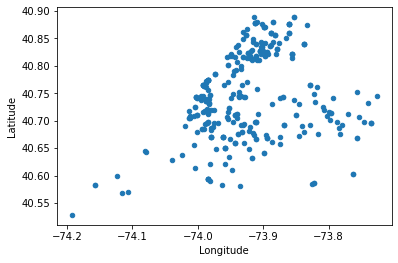

In [30]:
data.plot(kind="scatter", x="Longitude", y="Latitude")
plt.savefig("bad_visualization_plot")

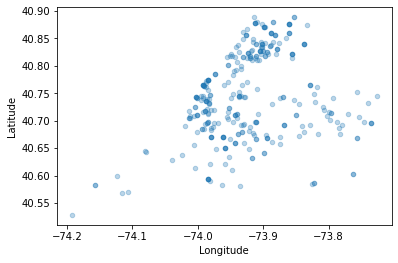

In [31]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.3)
plt.savefig("better_visualization_plot")

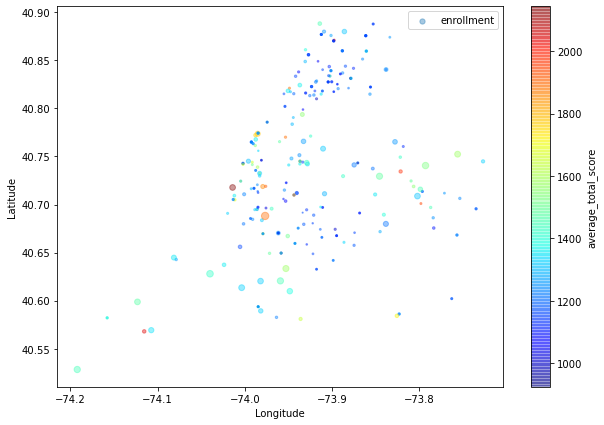

In [32]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=data["Student Enrollment"]/100, label="enrollment", figsize=(10,7),
             c="average_total_score", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.savefig("scores_scatterplot")

In [33]:
# Extra: Find NY image

## Correlation

In [34]:
corr_matrix = data.corr()

In [35]:
corr_matrix["average_total_score"].sort_values(ascending=False)

average_total_score    1.000000
Percent White          0.643215
Percent Asian          0.616540
Percent Tested         0.591409
Student Enrollment     0.398092
Zip Code              -0.069265
Latitude              -0.147067
Longitude             -0.153895
Percent Black         -0.303411
Percent Hispanic      -0.427499
Name: average_total_score, dtype: float64

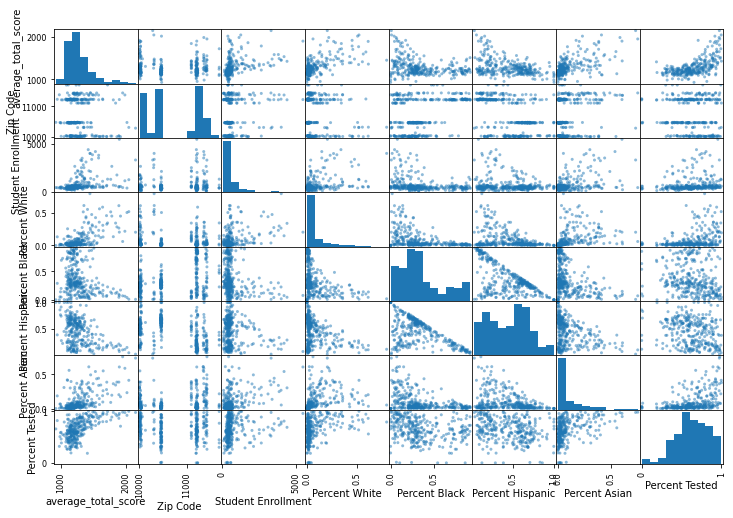

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["average_total_score", "Zip Code", "Student Enrollment", "Percent White", "Percent Black", "Percent Hispanic", "Percent Asian", "Percent Tested"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot")

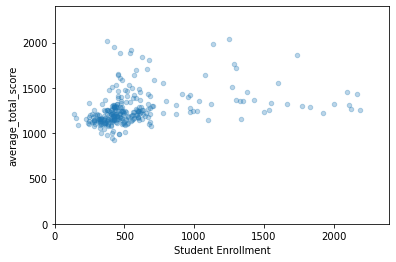

In [37]:
data.plot(kind="scatter", x="Student Enrollment", y="average_total_score", alpha=0.3)
plt.axis([0, 2400, 0, 2400])
plt.savefig("enrollment_vs_score_scatterplot")

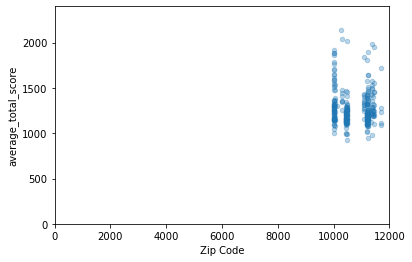

In [38]:
data.plot(kind="scatter", x="Zip Code", y="average_total_score", alpha=0.3)
plt.axis([0, 12000, 0, 2400])
plt.savefig("zipcode_vs_score_scatterplot")

In [39]:
# Cannot experiment with attibute combinations

# Prepare the Data for Machine Learning Algorithms

In [40]:
# drop nans
strat_train_set = strat_train_set.dropna()
data = strat_train_set.drop("average_total_score", axis=1) # drop labels for training set
data_labels = strat_train_set["average_total_score"].copy()

In [41]:
data

,School ID,Borough,Building Code,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested
80,05M692,Manhattan,M812,Manhattan,10031,40.82112,-73.94885,8:00 AM,3:35 PM,470.0,0.268,0.096,0.217,0.385,0.926
40,02M615,Manhattan,M615,Manhattan,10013,40.72435,-74.00476,8:30 AM,4:00 PM,439.0,0.032,0.289,0.574,0.082,0.804
164,10X437,Bronx,X435,Bronx,10458,40.86001,-73.88823,8:00 AM,3:45 PM,401.0,0.025,0.309,0.651,0.010,0.562
298,22K405,Brooklyn,K405,Brooklyn,11210,40.63334,-73.95292,8:45 AM,3:30 PM,3787.0,0.233,0.298,0.125,0.337,0.857
312,21K348,Brooklyn,K400,Brooklyn,11214,40.59359,-73.98473,7:45 AM,3:45 PM,290.0,0.055,0.724,0.169,0.038,0.562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,19K409,Brooklyn,K819,Brooklyn,11207,40.66064,-73.88634,8:00 AM,3:00 PM,479.0,0.004,0.676,0.295,0.022,0.667
83,06M346,Manhattan,M814,Manhattan,10032,40.83356,-73.94180,8:15 AM,3:00 PM,629.0,0.027,0.049,0.918,0.000,0.553
428,27Q260,Queens,Q465,Far Rockaway,11691,40.60199,-73.76283,7:45 AM,2:05 PM,409.0,0.007,0.597,0.379,0.015,0.301
328,20K485,Brooklyn,K485,Brooklyn,11220,40.63725,-74.02382,8:00 AM,3:00 PM,1329.0,0.163,0.077,0.567,0.180,0.816


## Data Cleaning

In [42]:
data.isna().sum()

School ID             0
Borough               0
Building Code         0
City                  0
Zip Code              0
Latitude              0
Longitude             0
Start Time            0
End Time              0
Student Enrollment    0
Percent White         0
Percent Black         0
Percent Hispanic      0
Percent Asian         0
Percent Tested        0
dtype: int64

## Text and Categorical Attributes

In [43]:
data_cat = data[["Borough"]]
data_cat.head(10)

,Borough
80,Manhattan
40,Manhattan
164,Bronx
298,Brooklyn
312,Brooklyn
244,Queens
114,Staten Island
52,Manhattan
431,Queens
136,Bronx


In [44]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [3.],
       [4.],
       [2.],
       [3.],
       [0.]])

In [45]:
ordinal_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object)]

In [46]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<296x5 sparse matrix of type '<class 'numpy.float64'>'
	with 296 stored elements in Compressed Sparse Row format>

In [47]:
data_cat_1hot.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [48]:
cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [49]:
cat_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object)]

In [50]:
data_cat = data[['Start Time']]
data_cat

,Start Time
80,8:00 AM
40,8:30 AM
164,8:00 AM
298,8:45 AM
312,7:45 AM
...,...
287,8:00 AM
83,8:15 AM
428,7:45 AM
328,8:00 AM


In [51]:
ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

print(ordinal_encoder.categories_)

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

print(data_cat_1hot.toarray())

cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

print(cat_encoder.categories_)

[array(['7:15 AM', '7:25 AM', '7:30 AM', '7:35 AM', '7:40 AM', '7:45 AM',
       '7:50 AM', '8:00 AM', '8:05 AM', '8:07 AM', '8:10 AM', '8:13 AM',
       '8:15 AM', '8:16 AM', '8:20 AM', '8:25 AM', '8:29 AM', '8:30 AM',
       '8:32 AM', '8:35 AM', '8:38 AM', '8:40 AM', '8:45 AM', '8:50 AM',
       '8:51 AM', '9:00 AM', '9:05 AM', '9:07 AM', '9:15 AM', '9:30 AM'],
      dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[array(['7:15 AM', '7:25 AM', '7:30 AM', '7:35 AM', '7:40 AM', '7:45 AM',
       '7:50 AM', '8:00 AM', '8:05 AM', '8:07 AM', '8:10 AM', '8:13 AM',
       '8:15 AM', '8:16 AM', '8:20 AM', '8:25 AM', '8:29 AM', '8:30 AM',
       '8:32 AM', '8:35 AM', '8:38 AM', '8:40 AM', '8:45 AM', '8:50 AM',
       '8:51 AM', '9:00 AM', '9:05 AM', '9:07 AM', '9:15 AM', '9:30 AM'],
      dtype=object)]


## Transformation Pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import copy

data_pipeline = data.copy()
data_pipeline = data_pipeline[["Latitude", "Longitude", "Student Enrollment", "Percent White", "Percent Black", "Percent Hispanic", "Percent Asian", "Percent Tested"]]
data_pipeline

,Latitude,Longitude,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested
80,40.82112,-73.94885,470.0,0.268,0.096,0.217,0.385,0.926
40,40.72435,-74.00476,439.0,0.032,0.289,0.574,0.082,0.804
164,40.86001,-73.88823,401.0,0.025,0.309,0.651,0.010,0.562
298,40.63334,-73.95292,3787.0,0.233,0.298,0.125,0.337,0.857
312,40.59359,-73.98473,290.0,0.055,0.724,0.169,0.038,0.562
...,...,...,...,...,...,...,...,...
287,40.66064,-73.88634,479.0,0.004,0.676,0.295,0.022,0.667
83,40.83356,-73.94180,629.0,0.027,0.049,0.918,0.000,0.553
428,40.60199,-73.76283,409.0,0.007,0.597,0.379,0.015,0.301
328,40.63725,-74.02382,1329.0,0.163,0.077,0.567,0.180,0.816


In [53]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()),])
data_pipeline_tr = num_pipeline.fit_transform(data_pipeline)

In [54]:
data_pipeline_tr

array([[ 0.95422052, -0.30372491, -0.37016447, ..., -0.9305874 ,
         2.00588579,  1.45375029],
       [-0.22681882, -1.09347774, -0.40906178, ...,  0.52857055,
        -0.14999434,  0.81284505],
       [ 1.42885749,  0.55255869, -0.45674234, ...,  0.84329089,
        -0.66228268, -0.4584588 ],
       ...,
       [-1.72017392,  2.32388768, -0.44670433, ..., -0.2684485 ,
        -0.6267071 , -1.82957577],
       [-1.28983965, -1.36270844,  0.70766725, ...,  0.49995961,
         0.54728703,  0.87588491],
       [ 0.34557702,  0.03881678, -0.2421798 , ..., -0.26436122,
         1.94896486,  1.8424961 ]])

In [55]:
data.head()

,School ID,Borough,Building Code,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested
80,05M692,Manhattan,M812,Manhattan,10031,40.82112,-73.94885,8:00 AM,3:35 PM,470.0,0.268,0.096,0.217,0.385,0.926
40,02M615,Manhattan,M615,Manhattan,10013,40.72435,-74.00476,8:30 AM,4:00 PM,439.0,0.032,0.289,0.574,0.082,0.804
164,10X437,Bronx,X435,Bronx,10458,40.86001,-73.88823,8:00 AM,3:45 PM,401.0,0.025,0.309,0.651,0.010,0.562
298,22K405,Brooklyn,K405,Brooklyn,11210,40.63334,-73.95292,8:45 AM,3:30 PM,3787.0,0.233,0.298,0.125,0.337,0.857
312,21K348,Brooklyn,K400,Brooklyn,11214,40.59359,-73.98473,7:45 AM,3:45 PM,290.0,0.055,0.724,0.169,0.038,0.562


In [56]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Latitude", "Longitude", "Student Enrollment", "Percent White", "Percent Black", "Percent Hispanic", "Percent Asian", "Percent Tested"]
cat_attribs = ["Borough", "Start Time"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

In [57]:
data_prepared

<296x43 sparse matrix of type '<class 'numpy.float64'>'
	with 2960 stored elements in Compressed Sparse Row format>

In [58]:
data_prepared.shape

(296, 43)

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [60]:
num_attribs = ["Latitude", "Longitude", "Student Enrollment", "Percent White", "Percent Black", "Percent Hispanic", "Percent Asian", "Percent Tested"]
cat_attribs = ["Borough", "Start Time"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [61]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [62]:
old_data_prepared = old_full_pipeline.fit_transform(data)
old_data_prepared

array([[ 0.95422052, -0.30372491, -0.37016447, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22681882, -1.09347774, -0.40906178, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.42885749,  0.55255869, -0.45674234, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.72017392,  2.32388768, -0.44670433, ...,  0.        ,
         0.        ,  0.        ],
       [-1.28983965, -1.36270844,  0.70766725, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34557702,  0.03881678, -0.2421798 , ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
old_data_prepared.shape

(296, 43)

In [64]:
# np.allclose(data_prepared, old_data_prepared)

# Select and Train Model

## Training and Evaluating on the Training Set

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [66]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [1745.72591342 1264.92809026 1191.47264601 1570.23304229 1246.93393096]


In [67]:
print("Labels:", list(some_labels))

Labels: [1889.0, 1257.0, 1214.0, 1580.0, 1102.0]


In [68]:
some_data_prepared

<5x43 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

96.64234636246314

In [70]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(data_labels, data_predictions)
lin_mae

69.06500873920699

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=25)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=25)

In [72]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [74]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [160.01885306 166.77289948 111.6012246  139.92438434 101.36090634
 140.51381901 148.39741609 167.30119442 208.59844281 155.7774717 ]
Mean: 150.02666118607948
Standard deviation: 28.605051640126863


In [75]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [110.31294465 107.68093272 119.12885622 157.99619654  84.90445731
 106.39102363 125.88957184 114.12514426 108.53921306  94.73478373]
Mean: 112.97031239424373
Standard deviation: 18.578714584555218


In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=42)

In [77]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

38.95166118998597

In [78]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 92.51535175  81.78187798  98.81635951 120.0642737   77.47934697
 103.3967162  118.34170884 120.39398835 104.88605944 117.56165084]
Mean: 103.52373335911211
Standard deviation: 15.070052224416209


In [79]:
scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count     10.000000
mean     112.970312
std       19.583685
min       84.904457
25%      106.713501
50%      109.426079
75%      117.877928
max      157.996197
dtype: float64

In [80]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_prepared, data_labels)
housing_predictions = svm_reg.predict(data_prepared)
svm_mse = mean_squared_error(data_labels, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

38.95166118998597

# Fine-Tune Model

## Grid Search

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=25)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared,data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=25),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [82]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [83]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=25)

In [84]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

135.37503852119096 {'max_features': 2, 'n_estimators': 3}
128.75072997434444 {'max_features': 2, 'n_estimators': 10}
125.49943466033133 {'max_features': 2, 'n_estimators': 30}
146.72472183904287 {'max_features': 4, 'n_estimators': 3}
122.81842026773568 {'max_features': 4, 'n_estimators': 10}
121.52929746205062 {'max_features': 4, 'n_estimators': 30}
149.76151805879348 {'max_features': 6, 'n_estimators': 3}
122.64812551627264 {'max_features': 6, 'n_estimators': 10}
114.85870563851125 {'max_features': 6, 'n_estimators': 30}
131.67471648138064 {'max_features': 8, 'n_estimators': 3}
122.34850088779807 {'max_features': 8, 'n_estimators': 10}
111.28454883926076 {'max_features': 8, 'n_estimators': 30}
140.92757443687304 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
120.18996924595926 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
141.61406793566852 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
124.86083721510319 {'bootstrap': False, 'max_features': 3, 'n

In [85]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008187,0.001321,0.001394,0.000795,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-10219.800000,-15685.858757,...,-18326.401055,5988.960451,14,-6598.357345,-3839.682138,-7407.474918,-6332.084857,-6782.475856,-6192.015023,1228.347703
1,0.015267,0.000926,0.001203,0.000394,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-7765.441667,-16800.066949,...,-16576.750469,7720.945830,11,-3105.889195,-2589.878481,-3680.633671,-3375.438439,-3290.688776,-3208.505712,360.764522
2,0.045625,0.001539,0.003017,0.000634,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-8482.052704,-18168.306780,...,-15750.108100,5996.398477,10,-2513.765791,-2238.214055,-2475.301233,-2609.254791,-2053.920422,-2378.091259,202.951374
3,0.005899,0.000373,0.000996,0.000003,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-10915.853704,-19030.382298,...,-21528.143999,8992.582080,17,-6032.245292,-5285.639475,-6371.835443,-7819.527895,-7903.901547,-6682.629930,1025.204084
4,0.017148,0.001574,0.001797,0.000746,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-6691.534667,-15342.512373,...,-15084.364357,7057.069252,8,-3046.188983,-2628.531055,-3316.345021,-3142.162152,-3185.710295,-3063.787501,234.329228
5,0.046545,0.004703,0.003431,0.001334,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-7324.048778,-13832.217420,...,-14769.370142,6255.770749,5,-2588.533508,-1846.491871,-2436.323366,-2379.155518,-1906.896765,-2231.480205,298.270416
6,0.005843,0.000348,0.000990,0.000014,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-15935.874074,-24509.926554,...,-22428.512291,6289.865467,18,-5754.181262,-5639.925926,-5634.023910,-4759.183310,-9657.257384,-6288.914358,1721.732778
7,0.015703,0.000418,0.001641,0.000465,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-7021.365667,-19057.641017,...,-15042.562693,6998.932365,7,-2877.861695,-2599.907215,-2623.386582,-2235.477215,-3547.735865,-2776.873715,436.443041
8,0.049503,0.002666,0.002678,0.000504,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-6285.146352,-15372.300942,...,-13192.522261,5324.700485,3,-2174.814011,-1737.785340,-1922.054304,-1735.285546,-1841.578884,-1882.303617,162.049867
9,0.006590,0.001214,0.000799,0.000400,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-14979.422222,-20430.630885,...,-17338.230960,6785.647391,12,-5183.943503,-5139.112518,-5734.781060,-4856.249883,-6888.296296,-5560.476652,722.322272


## Randomized Search

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=25)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=25),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001823C0D4490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001823C0C81C0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [87]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

108.37158387009167 {'max_features': 7, 'n_estimators': 180}
118.47821057441959 {'max_features': 5, 'n_estimators': 15}
118.47129594987092 {'max_features': 3, 'n_estimators': 72}
116.48594348253894 {'max_features': 5, 'n_estimators': 21}
109.10401639436509 {'max_features': 7, 'n_estimators': 122}
117.88285064002399 {'max_features': 3, 'n_estimators': 75}
117.79458792376774 {'max_features': 3, 'n_estimators': 88}
112.66253758594775 {'max_features': 5, 'n_estimators': 100}
118.76528379705432 {'max_features': 3, 'n_estimators': 150}
150.53706860910947 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [88]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.52891260e-02, 6.24110831e-02, 9.79747409e-02, 1.73902708e-01,
       7.19989952e-02, 1.21754152e-01, 1.49583067e-01, 2.02091648e-01,
       8.85220481e-03, 6.03466358e-03, 1.43526446e-02, 3.86942532e-03,
       3.66901878e-03, 4.65926913e-04, 5.74335904e-04, 1.30315375e-03,
       1.10350993e-05, 3.88659599e-05, 4.15761477e-03, 9.37920303e-04,
       5.75079863e-03, 1.46794245e-04, 2.44989975e-04, 5.68905143e-04,
       3.15845485e-04, 2.76665360e-03, 1.86726794e-04, 3.12959648e-03,
       1.46090722e-03, 7.25269258e-06, 4.14979394e-03, 3.65329376e-04,
       1.49346467e-03, 5.56132847e-04, 1.51520317e-03, 2.92575625e-03,
       4.62227923e-04, 2.61006152e-05, 3.46396456e-03, 7.88461736e-05,
       3.39254061e-06, 9.27779040e-04, 1.81207833e-04])

In [89]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.20209164841186358, 'Percent Tested'),
 (0.17390270832083118, 'Percent White'),
 (0.1495830674691115, 'Percent Asian'),
 (0.12175415167506476, 'Percent Hispanic'),
 (0.09797474091501336, 'Student Enrollment'),
 (0.0719989951711062, 'Percent Black'),
 (0.06241108308315743, 'Longitude'),
 (0.04528912598870924, 'Latitude'),
 (0.014352644567489088, 'bedrooms_per_room'),
 (0.008852204814151866, 'rooms_per_hhold'),
 (0.006034663578818045, 'pop_per_hhold'),
 (0.0038694253192430006, 'Bronx'),
 (0.0036690187762039037, 'Brooklyn'),
 (0.0013031537539854423, 'Staten Island'),
 (0.0005743359036852821, 'Queens'),
 (0.0004659269128735284, 'Manhattan')]

## Evaluate Your System on the Test Set

In [91]:
final_model = grid_search.best_estimator_

# drop nans
strat_test_set = strat_test_set.dropna()

X_test = strat_test_set.drop("average_total_score", axis=1) # drop labels for test set
y_test = strat_test_set["average_total_score"].copy()
y_test = y_test.dropna()
X_test.head()

print(strat_test_set.shape, y_test.shape)

(78, 16) (78,)


In [92]:
rows = X_test.index[X_test['Start Time'].isin(['9:50 AM', '8:22 AM', '9:08 AM', '7:28 AM', '8:33 AM'])].tolist()
X_test = X_test[~X_test['Start Time'].isin(['9:50 AM', '8:22 AM', '9:08 AM', '7:28 AM', '8:33 AM'])]
X_test.head()

,School ID,Borough,Building Code,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested
154,09X413,Bronx,X410,Bronx,10457,40.84037,-73.91084,7:45 AM,3:15 PM,472.0,0.007,0.367,0.534,0.071,0.839
101,02M459,Manhattan,M480,Manhattan,10065,40.76545,-73.96021,8:45 AM,3:05 PM,343.0,0.122,0.166,0.411,0.294,0.586
249,30Q501,Queens,Q570,Astoria,11106,40.75653,-73.92514,7:45 AM,3:15 PM,808.0,0.387,0.136,0.334,0.105,0.895
219,12X692,Bronx,X420,Bronx,10472,40.83137,-73.87882,8:30 AM,3:00 PM,445.0,0.009,0.180,0.784,0.011,0.468
69,05M362,Manhattan,M125,Manhattan,10027,40.81092,-73.95693,8:00 AM,4:00 PM,659.0,0.148,0.220,0.481,0.137,0.882


In [93]:
X_test.shape

(73, 15)

In [94]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 154 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   School ID           73 non-null     object 
 1   Borough             73 non-null     object 
 2   Building Code       73 non-null     object 
 3   City                73 non-null     object 
 4   Zip Code            73 non-null     int64  
 5   Latitude            73 non-null     float64
 6   Longitude           73 non-null     float64
 7   Start Time          73 non-null     object 
 8   End Time            73 non-null     object 
 9   Student Enrollment  73 non-null     float64
 10  Percent White       73 non-null     float64
 11  Percent Black       73 non-null     float64
 12  Percent Hispanic    73 non-null     float64
 13  Percent Asian       73 non-null     float64
 14  Percent Tested      73 non-null     float64
dtypes: float64(8), int64(1), object(6)
memory usage: 9.1+ KB

In [95]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

y_test.drop(rows, inplace=True)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [96]:
final_rmse

98.8527690007579

In [97]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([ 75.41618139, 117.71210415])

In [98]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(75.41618138697909, 117.71210414923637)

In [99]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(75.86985823999514, 117.42020477276236)